In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/data_all.csv')

In [101]:
df_full.drop(columns=['Florida', 'Idaho', 'Indiana', 'Maine', 'Nevada', 'Oregon',
       'Rhode Island', 'South Carolina', 'Utah', 'Vermont', 'Virginia',
       'Wisconsin','DECIDE'], axis=1, inplace=True)

In [102]:
df_full.shape

(63883, 129)

In [103]:
X = df_full.iloc[:, :-1]
y = df_full.iloc[:,-1]
print(X.shape)
print(y.shape)

(63883, 128)
(63883,)


In [122]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
split=list(enumerate(skf.split(df_full, df_full.Class)))
folds={i[0]:i[1][1] for i in split}
train_idx = np.concatenate((folds[0], folds[1], folds[2], folds[3]))
# val_idx = folds[3]
test_idx =  folds[4]

X_train = X.iloc[train_idx]
# X_val = X.iloc[val_idx]
X_test = X.iloc[test_idx]

y_train = y.iloc[train_idx]
# y_val = y.iloc[val_idx]
y_test = y.iloc[test_idx]

In [104]:
len(train_idx)
#len(val_idx)


57494

In [105]:
len(test_idx)

6389

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print the number of components
print(f"PCA reduced the number of features to: {pca.n_components_}")

PCA reduced the number of features to: 111


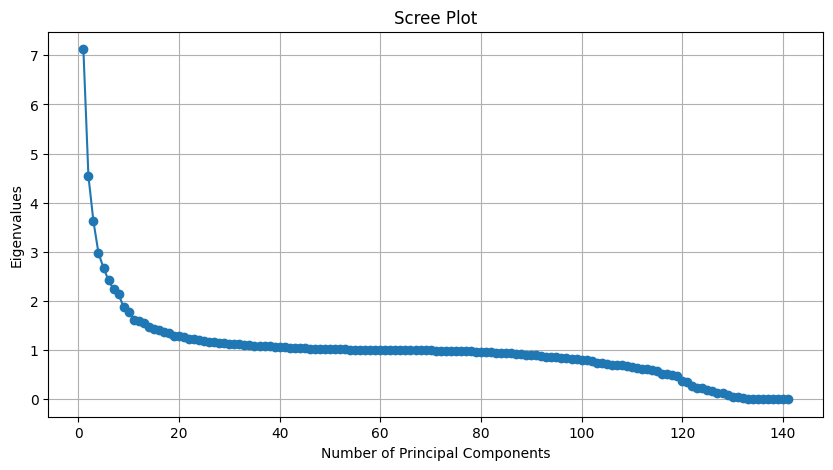

In [107]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming X_train and X_test have already been defined and standardized

# Fit PCA on the training set without reducing dimensionality
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Plotting the Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca_full.explained_variance_) + 1), pca_full.explained_variance_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

In [110]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.preprocessing import StandardScaler

# def create_grid_search_random_forest():
#     """
#     Creates a pipeline with a random forest classifier and a grid search object
#     to find the best hyperparameters for the random forest model.

#     Returns:
#         GridSearchCV object
#     """
#     # Define the parameter grid for the random forest model
#     param_grid = {
#         'randomforestclassifier__n_estimators': [100, 200, 300, 400, 500],
#         #'randomforestclassifier__max_depth': [None, 5, 10, 20, 30],
#         #'randomforestclassifier__min_samples_split': [2, 5, 10],
#         #'randomforestclassifier__min_samples_leaf': [1, 2, 4]
#     }

#     # Create a pipeline with the random forest classifier
#     random_forest_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))

#     # Create the grid search object
#     grid_search = GridSearchCV(random_forest_pipeline, param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

#     return grid_search


In [ ]:
  # param = {
  #       'randomforestclassifier__n_estimators': [100, 200, 300, 400, 500],
  #       #'randomforestclassifier__max_depth': [None, 5, 10, 20, 30],
  #       #'randomforestclassifier__min_samples_split': [2, 5, 10],
  #       #'randomforestclassifier__min_samples_leaf': [1, 2, 4]
  #   }
  # grid_search = GridSearchCV(random_forest_pipeline,  param, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

In [115]:
# from sklearn.model_selection import StratifiedKFold
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# split = list(enumerate(skf.split(df_full, df_full.Class)))
# folds = {i[0]: i[1][1] for i in split}

# # for i in range(fold):
# #     test_idx = folds[i]
# #     train_idx = np.concatenate([folds[j] for j in range(fold) if j != i])

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# rf = RandomForestClassifier()

# parameters = {'n_estimators': [100, 200, 300, 400, 500]}
# grid_search = GridSearchCV(estimator = rf, param_grid = parameters, cv = 5)
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(   best_params,     best_score)

{'n_estimators': 500} 0.8956286916128707


In [53]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Assuming X_train_pca and y_train are already defined and ready to use

# # Define the parameter grid to search
# param_grid = {
#     'n_estimators': [100, 200, 300],  # List of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False]        # Method for sampling data points (with or without replacement)
# }

# # Initialize a Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Initialize the Grid Search model
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(X_train_pca, y_train)

# # Print the best parameters found by Grid Search
# print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8912805259862242
Classification Report:
               precision    recall  f1-score   support

     Mild CD       0.11      0.01      0.02       742
 Moderate CD       0.20      0.04      0.06       415
       No CD       0.90      0.99      0.94     11439
   Severe CD       0.37      0.09      0.14       180

    accuracy                           0.89     12776
   macro avg       0.40      0.28      0.29     12776
weighted avg       0.82      0.89      0.85     12776



In [124]:
y_test.unique()

array(['Mild CD', 'No CD', 'Moderate CD', 'Severe CD'], dtype=object)

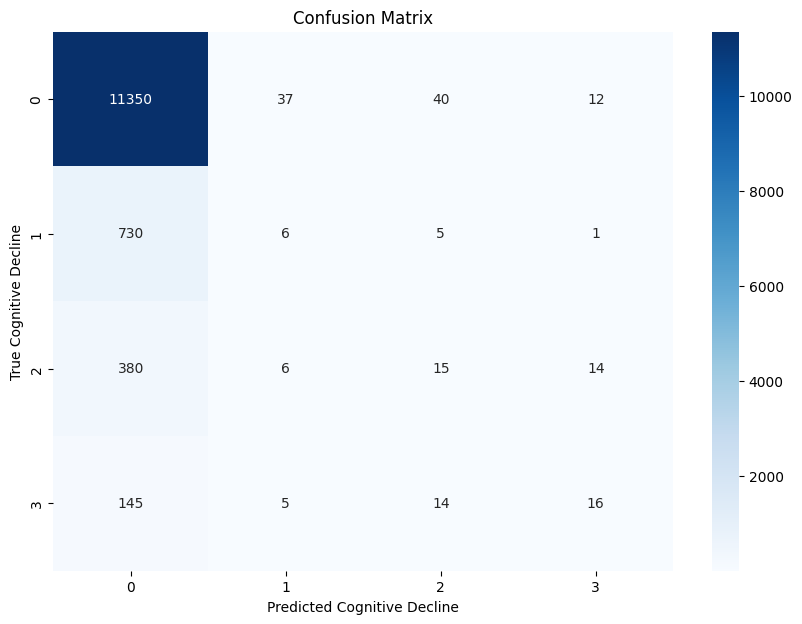

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the confusion matrix with the real labels
cm = confusion_matrix(y_test, y_pred, labels=['No CD','Mild CD', 'Moderate CD', 'Severe CD'])


# Calculate the confusion matrix
#cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Cognitive Decline')
plt.ylabel('True Cognitive Decline')
plt.show()

In [14]:
# from sklearn.metrics import accuracy_score, confusion_matrix
# import seaborn as sns

# conf_matrix = confusion_matrix(predictions, y_binary_test)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

Weighted RFC

In [15]:
# weight = np.unique(y_binary_train, return_counts = True)
# print(weight)
# weights = weight[1]/ len(y_binary_train)
# class_weight = {0: weights[0], 1: weights[1]}
# print(class_weight)

# RFC2 = RandomForestClassifier(n_estimators=100, class_weight = class_weight, random_state=42)

# RFC2.fit(X_train_pca, y_binary_train)

# X_test_pca = pca.transform(X_test)
# predictions2 = RFC2.predict(X_test_pca)

# # Evaluate the accuracy of the model
# accuracy = accuracy_score(y_binary_test, predictions2)
# print("Accuracy:", accuracy)

In [16]:
# conf_matrix = confusion_matrix(predictions2, y_binary_test)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [17]:
# from sklearn.model_selection import cross_val_score

# # Perform 5-fold cross-validation
# cv_scores = cross_val_score(RFC2, X_train, y_binary_train, cv=5, scoring='accuracy')

# # Print the cross-validation scores
# print("Cross-Validation Scores:", cv_scores)
# print("Mean CV Score:", cv_scores.mean())

In [18]:
# from sklearn.linear_model import LogisticRegression

# logistic_regression = LogisticRegression()

# logistic_regression.fit(X_train, y_train)

# # Make predictions on the test data
# test_predictions = logistic_regression.predict(X_test)

# # Calculate the accuracy of the model on the test data
# test_accuracy = accuracy_score(y_binary_test, test_predictions)
# print("Test Accuracy:", test_accuracy)


In [19]:
# from sklearn.svm import SVC
# svm_classifier = SVC(kernel='linear', class_weight=class_weight)
# svm_classifier.fit(X_train, y_binary_train)
# test_predictions = svm_classifier.predict(X_test)
# test_accuracy = accuracy_score(y_binary_test, test_predictions)
# print("Test Accuracy:", test_accuracy)
